## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
#nvidia-smi 指令僅適用於 mac 與 linux 作業系統, windows 無法執行該指令, 但不影響後續程式, 請無法執行的同學忽略即可

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import numpy as np
import pandas as pd
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:

# 從 Keras 的內建資料集中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data( )

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x =  (x - x.min()) / (x.max() - x.min())  
    
    if flatten:
        x = x.reshape(len(x), -1)
    return x

# OneHot Encoding
def preproc_y( y, num_classes = 10 ) :
    if y.shape[ -1 ] == 1 :
        y = keras.utils.to_categorical( y, num_classes )
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

In [6]:

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)



In [7]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0716 18:50:17.059117  4244 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 18:50:17.332118  4244 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 18:50:17.388141  4244 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,804,682
Trainable params: 1,804,682
Non-trainable params: 0
_________________________________________________________________


In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 18:50:17.641680  4244 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 18:50:17.658313  4244 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 18:50:17.827001  4244 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 18:50:17.900627  4244 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 385us/step - loss: 1.9152 - acc: 0.3041 - val_loss: 1.7876 - val_acc: 0.3624
Epoch 2/100
50000/50000 [==============================] - 15s 292us/step - loss: 1.6988 - acc: 0.3909 - val_loss: 1.6272 - val_acc: 0.4208
Epoch 3/100
50000/50000 [==============================] - 15s 296us/step - loss: 1.5899 - acc: 0.4303 - val_loss: 1.5803 - val_acc: 0.4327
Epoch 4/100
50000/50000 [==============================] - 15s 304us/step - loss: 1.5402 - acc: 0.4504 - val_loss: 1.5211 - val_acc: 0.4609
Epoch 5/100
50000/50000 [==============================] - 16s 310us/step - loss: 1.4779 - acc: 0.4724 - val_loss: 1.5501 - val_acc: 0.4583
Epoch 6/100
50000/50000 [==============================] - 15s 297us/step - loss: 1.4574 - acc: 0.4778 - val_loss: 1.4553 - val_acc: 0.4842
Epoch 7/100
50000/50000 [==============================] - 15s 304us/step - loss: 1.4127 - acc: 0.4957 - val_l

Epoch 59/100
50000/50000 [==============================] - 15s 290us/step - loss: 0.3405 - acc: 0.8777 - val_loss: 2.6751 - val_acc: 0.5033
Epoch 60/100
50000/50000 [==============================] - 14s 286us/step - loss: 0.3536 - acc: 0.8727 - val_loss: 2.6947 - val_acc: 0.5035
Epoch 61/100
50000/50000 [==============================] - 14s 288us/step - loss: 0.3560 - acc: 0.8726 - val_loss: 2.7972 - val_acc: 0.4940
Epoch 62/100
50000/50000 [==============================] - 15s 293us/step - loss: 0.3231 - acc: 0.8844 - val_loss: 2.8082 - val_acc: 0.4982
Epoch 63/100
50000/50000 [==============================] - 14s 288us/step - loss: 0.3487 - acc: 0.8731 - val_loss: 2.8354 - val_acc: 0.5000
Epoch 64/100
50000/50000 [==============================] - 14s 287us/step - loss: 0.3242 - acc: 0.8831 - val_loss: 2.8386 - val_acc: 0.5016
Epoch 65/100
50000/50000 [==============================] - 16s 326us/step - loss: 0.2866 - acc: 0.8976 - val_loss: 2.9496 - val_acc: 0.4972
Epoch 66/100


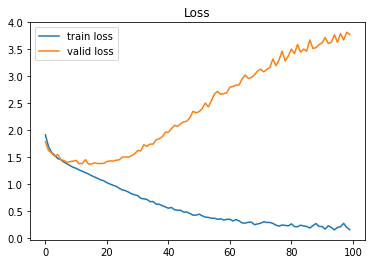

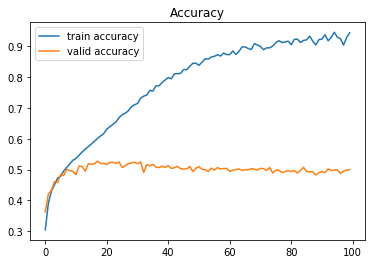

In [13]:

# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()